Pytorch의 Transform을 사용하여, 데이터 전처리 및 데이터 증강을 할 수 있습니다. 

https://pytorch.org/vision/stable/transforms.html

사전 모델의 경우 어떤 방식으로 전처리를 하라고 나와 있습니다.  

https://pytorch.org/vision/main/models/generated/torchvision.models.mobilenet_v3_small.html#torchvision.models.MobileNet_V3_Small_Weights

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.models as models

path = '/content/drive/MyDrive/Teaching/DL 202301/Cats'

train_data = datasets.ImageFolder(path + '/train')


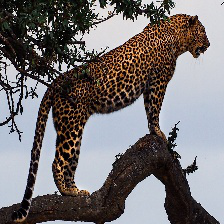

In [ ]:
train_data[0][0]

In [ ]:
type(train_data[0][0])

PIL.Image.Image

ToTensor()로 변경하지 않으면 PIL 이미지 타입으로 불러와집니다. 

Transform을 활용해서 변환해봅시다

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
train_data2 = datasets.ImageFolder(path + '/train', transform = transform)

In [ ]:
train_data2[0][0]

tensor([[[0.0667, 0.0706, 0.1333,  ..., 0.8627, 0.8471, 0.8471],
         [0.0431, 0.0941, 0.1098,  ..., 0.8431, 0.8510, 0.8980],
         [0.0078, 0.1333, 0.0627,  ..., 0.8353, 0.9373, 0.0039],
         ...,
         [0.1608, 0.1804, 0.1412,  ..., 0.7686, 0.7882, 0.7647],
         [0.1490, 0.1647, 0.1255,  ..., 0.7804, 0.7608, 0.7686],
         [0.2039, 0.1216, 0.0863,  ..., 0.7725, 0.7686, 0.7608]],

        [[0.0706, 0.0745, 0.1373,  ..., 0.8667, 0.8510, 0.8510],
         [0.0471, 0.0980, 0.1137,  ..., 0.8471, 0.8549, 0.9020],
         [0.0118, 0.1373, 0.0627,  ..., 0.8392, 0.9412, 0.0078],
         ...,
         [0.1216, 0.1412, 0.1098,  ..., 0.7922, 0.8196, 0.7922],
         [0.1098, 0.1255, 0.0941,  ..., 0.7961, 0.7843, 0.7961],
         [0.1647, 0.0824, 0.0549,  ..., 0.7882, 0.7922, 0.7843]],

        [[0.0510, 0.0549, 0.1176,  ..., 0.8824, 0.8667, 0.8667],
         [0.0275, 0.0784, 0.0941,  ..., 0.8627, 0.8706, 0.9176],
         [0.0000, 0.1176, 0.0549,  ..., 0.8549, 0.9569, 0.

In [ ]:
train_data2[0][0].shape

torch.Size([3, 224, 224])

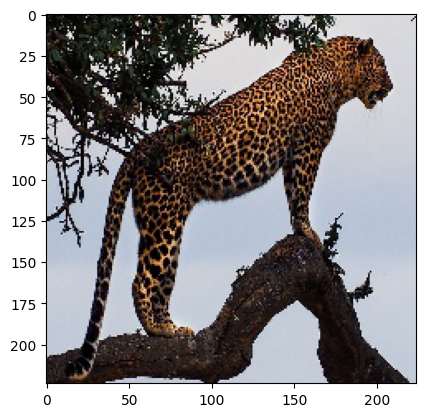

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data2[0][0].numpy().transpose(1,2,0))

(array([10319.,  8136.,  3216.,  1769.,  1374.,  1032.,   963., 16204.,
         6472.,   691.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

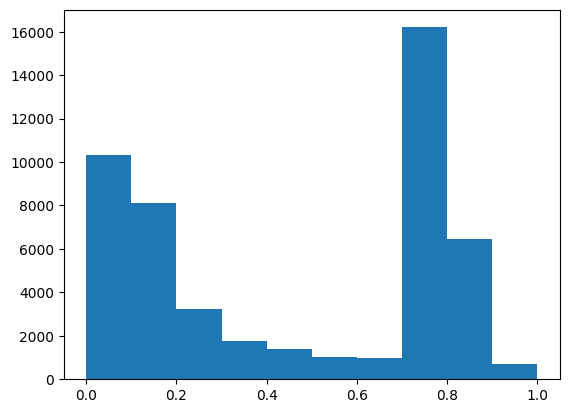

In [ ]:
plt.hist(train_data2[0][0][0,:,:].ravel())

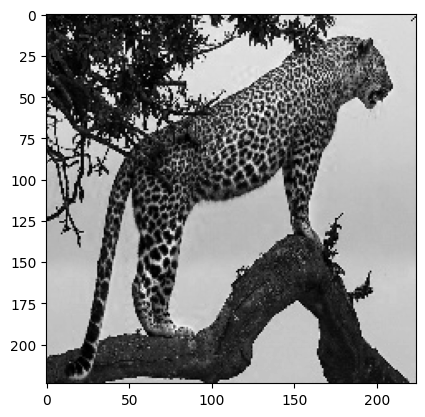

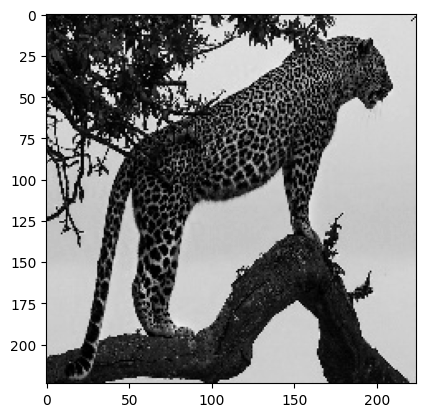

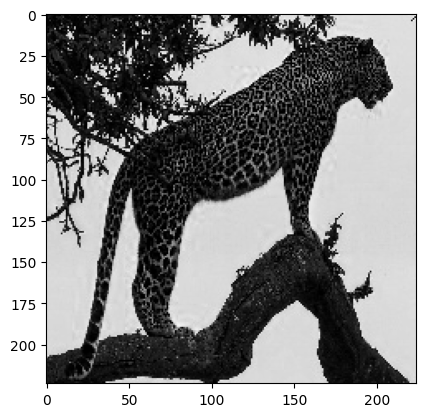

In [ ]:
plt.imshow(train_data2[0][0][0,:,:], cmap='gray')
plt.figure()
plt.imshow(train_data2[0][0][1,:,:], cmap='gray')
plt.figure()
plt.imshow(train_data2[0][0][2,:,:], cmap='gray')


In [ ]:
from tqdm import tqdm
loader = torch.utils.data.DataLoader(train_data2, batch_size=32)

mean = torch.zeros(3)
std = torch.zeros(3)
nb_samples = 0

for data, _ in tqdm(loader):
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print('Red channel Mean:', mean[0])
print('Green channel Mean:', mean[1])
print('Blue channel Mean:', mean[2])
print('Red channel Standard deviation:', std[0])
print('Green channel Standard deviation:', std[1])
print('Blue channel Standard deviation:', std[2])

100%|██████████| 74/74 [04:31<00:00,  3.67s/it]

Red channel Mean: tensor(0.4903)
Green channel Mean: tensor(0.4462)
Blue channel Mean: tensor(0.3667)
Red channel Standard deviation: tensor(0.2175)
Green channel Standard deviation: tensor(0.2066)
Blue channel Standard deviation: tensor(0.2014)


In [ ]:
print('mean',mean)
print('std',std)

mean tensor([0.4903, 0.4462, 0.3667])
std tensor([0.2175, 0.2066, 0.2014])


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4903, 0.4462, 0.3667], std=[0.2175, 0.2066, 0.2014])  # (R, G, B) 순서
])

In [ ]:
train_data3 = datasets.ImageFolder(path + '/train', transform = transform)

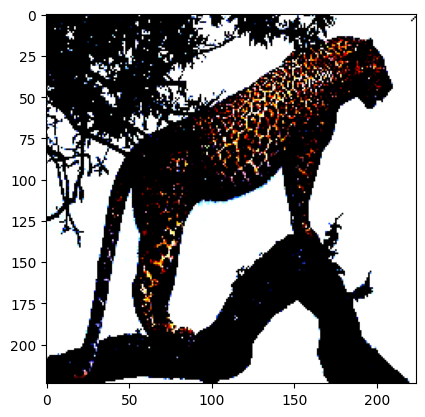

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data3[0][0].numpy().transpose(1,2,0))